In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

In [2]:
df=pd.read_excel('202108_Contest_Marvel_DC.xlsx')
df.head()

,Row_Number,Name,Biography name,Place of birth,First appearance,Gender,Eye color,Race,Hair color,Height (ft),...,Web Creation,Reality Warping,Odin Force,Symbiote Costume,Speed Force,Phoenix Force,Molecular Dissipation,Vision - Cryo,Omnipresent,Omniscient
0,1.0,A-Bomb,Richard Milhouse Jones,"Scarsdale, Arizona","Hulk Vol 2 #2 (April, 2008) (as A-Bomb)",Male,yellow,Human,No Hair,6.660105,...,False,False,False,False,False,False,False,False,False,False
1,2.0,Abin Sur,-,Ungara,"Showcase #22 (October, 1959)",Male,blue,Ungaran,No Hair,6.069554,...,False,False,False,False,False,False,False,False,False,False
2,3.0,Abomination,Emil Blonsky,"Zagreb, Yugoslavia",Tales to Astonish #90,Male,green,Human / Radiation,No Hair,6.660105,...,False,False,False,False,False,False,False,False,False,False
3,4.0,Abraxas,Abraxas,Within Eternity,Fantastic Four Annual #2001,Male,blue,Cosmic Entity,Black,-,...,False,False,False,False,False,False,False,False,False,False
4,5.0,Absorbing Man,Carl Creel,"New York City, New York","Daredevil #1 (April, 1964) (As Rocky Davis)",Male,blue,Human,No Hair,6.332021,...,False,False,False,False,False,False,False,False,False,False


In [3]:
df.columns

Index(['Row_Number', 'Name', 'Biography name', 'Place of birth',
       'First appearance', 'Gender', 'Eye color', 'Race', 'Hair color',
       'Height (ft)',
       ...
       'Web Creation', 'Reality Warping', 'Odin Force', 'Symbiote Costume',
       'Speed Force', 'Phoenix Force', 'Molecular Dissipation',
       'Vision - Cryo', 'Omnipresent', 'Omniscient'],
      dtype='object', length=191)

In [4]:
dtype=[]
for i in df.columns:
    dtype.append(str(type(df.loc[0,i])))
dtype

["<class 'numpy.float64'>",
 "<class 'str'>",
 "<class 'str'>",
 "<class 'str'>",
 "<class 'str'>",
 "<class 'str'>",
 "<class 'str'>",
 "<class 'str'>",
 "<class 'str'>",
 "<class 'float'>",
 "<class 'float'>",
 "<class 'float'>",
 "<class 'float'>",
 "<class 'str'>",
 "<class 'str'>",
 "<class 'str'>",
 "<class 'str'>",
 "<class 'str'>",
 "<class 'float'>",
 "<class 'float'>",
 "<class 'float'>",
 "<class 'float'>",
 "<class 'float'>",
 "<class 'float'>",
 "<class 'numpy.bool_'>",
 "<class 'numpy.bool_'>",
 "<class 'numpy.bool_'>",
 "<class 'numpy.bool_'>",
 "<class 'numpy.bool_'>",
 "<class 'numpy.bool_'>",
 "<class 'numpy.bool_'>",
 "<class 'numpy.bool_'>",
 "<class 'numpy.bool_'>",
 "<class 'numpy.bool_'>",
 "<class 'numpy.bool_'>",
 "<class 'numpy.bool_'>",
 "<class 'numpy.bool_'>",
 "<class 'numpy.bool_'>",
 "<class 'numpy.bool_'>",
 "<class 'numpy.bool_'>",
 "<class 'numpy.bool_'>",
 "<class 'numpy.bool_'>",
 "<class 'numpy.bool_'>",
 "<class 'numpy.bool_'>",
 "<class 'numpy.bo

In [5]:
str_num=[]
float_num=[]
bool_num=[]

n=0
for i in dtype:
    if i=="<class 'str'>":str_num.append(n)
    elif (i=="<class 'float'>")|(i=="<class 'int'>"):float_num.append(n)
    elif i=="<class 'numpy.bool_'>":bool_num.append(n)
    n+=1

In [6]:
str_num

[1, 2, 3, 4, 5, 6, 7, 8, 13, 14, 15, 16, 17]

In [7]:
str_index=[df.columns[i] for i in str_num]
float_index=[df.columns[i] for i in float_num]
bool_index=[df.columns[i] for i in bool_num]

In [8]:
str_index

['Name',
 'Biography name',
 'Place of birth',
 'First appearance',
 'Gender',
 'Eye color',
 'Race',
 'Hair color',
 'Publisher',
 'Work occupation',
 'Work base',
 'Skin color',
 'Alignment']

In [9]:
import wget
import os
import matplotlib

file=wget.download('https://labfile.oss.aliyuncs.com/courses/3023/NotoSansCJK.otf')
fpath=os.path.join('./NotoSansCJK.otf')
myfont=matplotlib.font_manager.FontProperties(fname=fpath,size=20)

100% [....................................................] 16638740 / 16638740

In [12]:
import os
import matplotlib

fpath=os.path.join('./NotoSansCJK.otf')
myfont=matplotlib.font_manager.FontProperties(fname=fpath,size=20)

# Proportion of Missing Value (Height, Weight, Int, Str, Spd, Dur, Po, Combat)

In [13]:
Missing_1=pd.DataFrame()
name_1=[]
for i in (float_index[0:1],float_index[3:]):
    for j in i:
        print(j+': '+str(df[j].value_counts(1)['-']))
        Missing_1=pd.concat([Missing_1,pd.Series(df[j].value_counts(1)['-'])],ignore_index=True)
        name_1.append(j)
        Missing_1['Data']=name_1
Missing_1=Missing_1.set_index('Data')
Missing_1.columns=['Missing Proportions']
Missing_1['Retained Proportions']=Missing_1.apply(lambda x:1-x)
Missing_1['Data']=name_1

Height (ft): 0.16698656429942418
Weight (kg): 0.18426103646833014
Intelligence: 0.0345489443378119
Strength: 0.0345489443378119
Speed: 0.0345489443378119
Durability: 0.0345489443378119
Power: 0.0345489443378119
Combat: 0.0345489443378119


In [15]:
import io
from PIL import Image

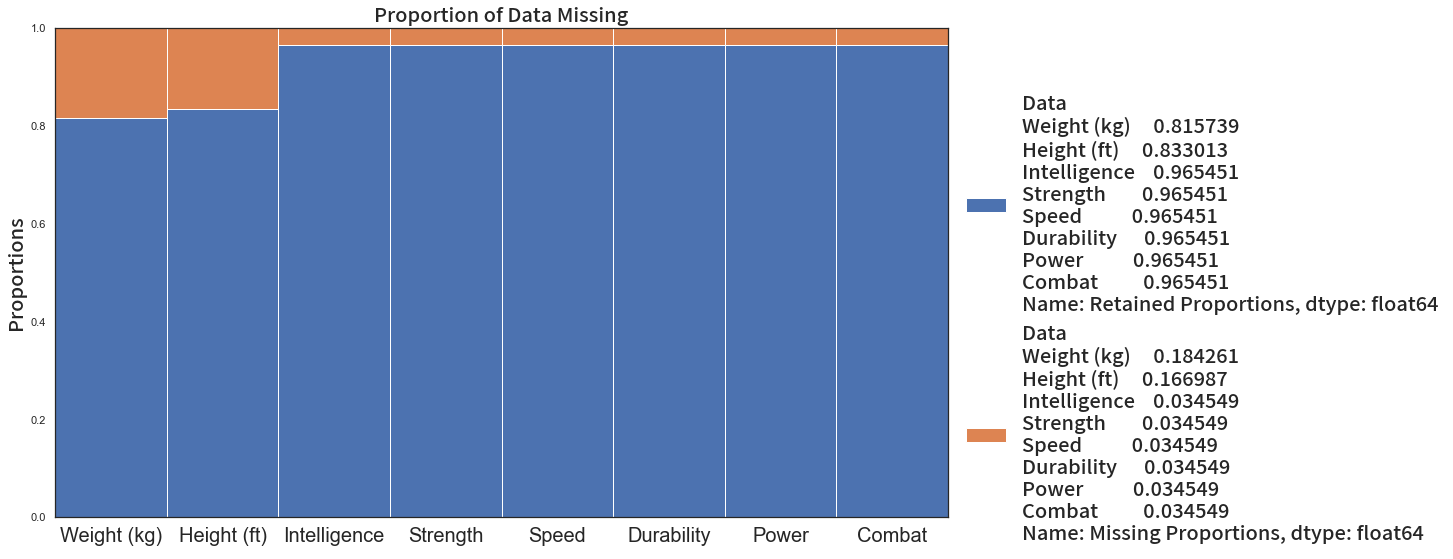

In [50]:
plt.rcParams['figure.figsize']=(16,9)
sns.set_style('white')

plt.bar(x='Data',height='Retained Proportions',data=Missing_1,width=1.0,label='Retained Proportions')
plt.bar(x='Data',height='Missing Proportions',bottom='Retained Proportions',data=Missing_1,width=1.0,label='Missing Proportions')
plt.xlim((-0.5,len(Missing_1)-0.5))
plt.ylim((0,1))

ax=plt.gca()
ax.set_xlabel(ax.get_xlabel(),fontproperties=myfont)
ax.set_ylabel('Proportions',fontproperties=myfont)
ax.xaxis.set_ticklabels(ticklabels=Missing_1.index,fontsize=20)
ax.set_title('Proportion of Data Missing',fontproperties=myfont)
ax.legend(prop=myfont,bbox_to_anchor=(1,0.9),frameon=False)

buffer=io.BytesIO()
plt.savefig(buffer,format='png',dpi=600,bbox_inches='tight',pad_inches=0)
buffer.seek(0)
pic_1=Image.open(buffer)

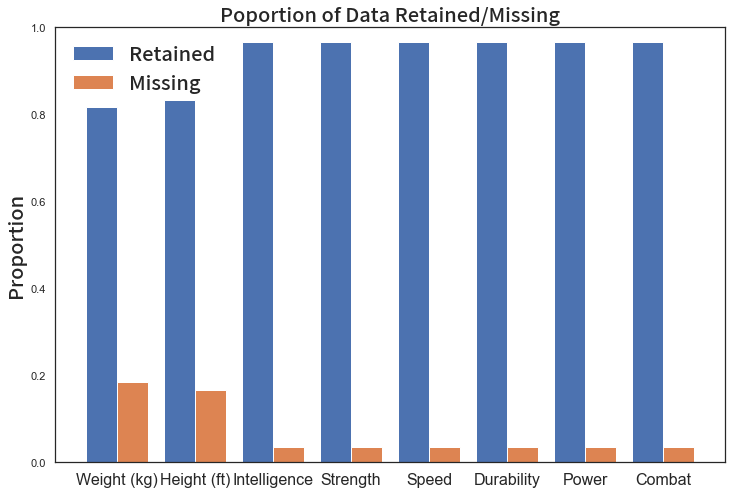

In [51]:
plt.rcParams['figure.figsize']=(12,8)
sns.set_style('white')

Missing_1=Missing_1.sort_values(['Retained Proportions'])
xs=np.array(range(len(Missing_1['Data'])))
width=.4
plt.bar(x=xs-width/2,height=Missing_1['Retained Proportions'],width=width,label='Retained')
plt.bar(x=xs+width/2,height=Missing_1['Missing Proportions'],width=width,label='Missing')
plt.ylim((0,1))
plt.xticks(ticks=xs,labels=Missing_1['Data'])

ax=plt.gca()
ax.set_xlabel(ax.get_xlabel(),fontproperties=myfont,fontsize=14)
ax.set_ylabel('Proportion',fontproperties=myfont)
ax.xaxis.set_ticklabels(ticklabels=ax.get_xticklabels(),fontsize=16)
ax.set_title('Poportion of Data Retained/Missing',fontproperties=myfont)
ax.legend(prop=myfont,frameon=False)

buffer=io.BytesIO()
plt.savefig(buffer,format='png',dpi=600,bbox_inches='tight',pad_inches=0)
buffer.seek(0)
pic_2=Image.open(buffer)

# Distribution of Existing Data

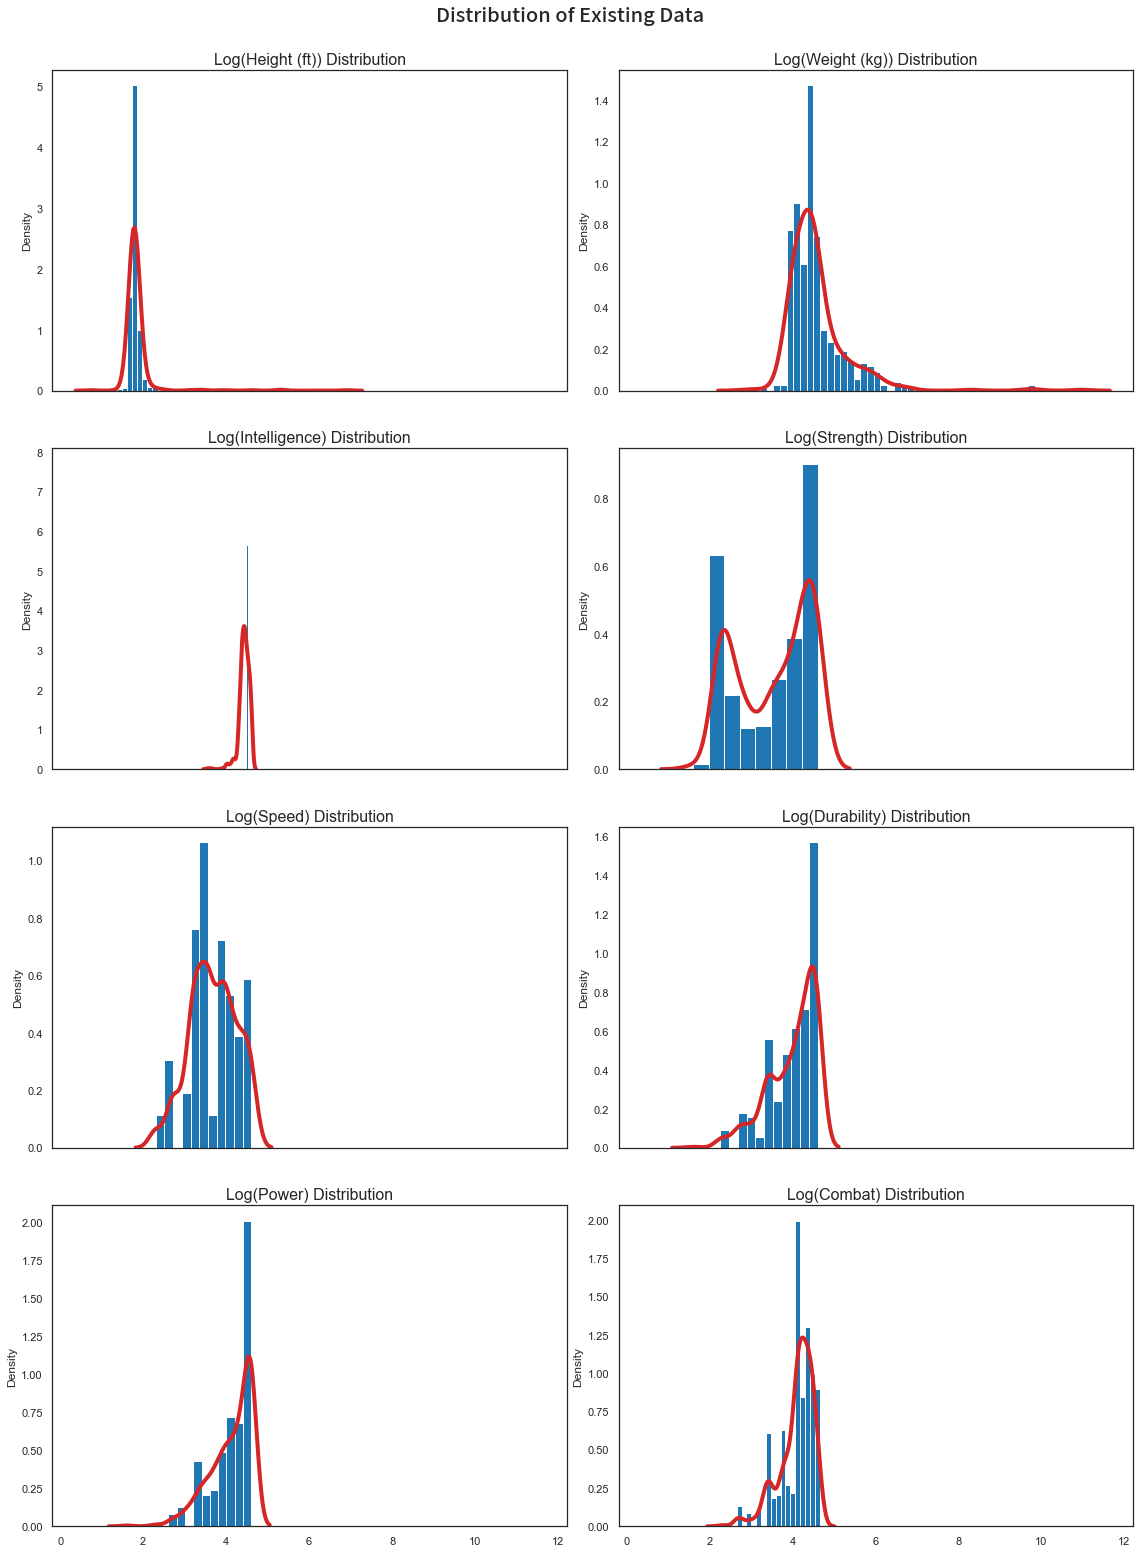

In [56]:
sns.set_style('white')
fig,axs=plt.subplots(4,2,sharex=True,figsize=(16,22))
axs=axs.ravel()
n=0
for i in (float_index[0:1],float_index[3:]):
    for j in i:
        ax=axs[n]
        data=df[df[j]!='-'].copy()
        x=np.log(data[[j]].values.tolist())
        sns.set()
        sns.distplot(x,color='tab:blue',hist_kws=dict(alpha=1),kde_kws=dict(color='tab:red',lw=4),ax=axs[n])
        ax.set_title('Log('+j+') Distribution',size=16)
        n+=1
fig.suptitle('Distribution of Existing Data',fontproperties=myfont)
fig.tight_layout()
plt.subplots_adjust(top=.94,wspace=.1,hspace=.18)

buffer=io.BytesIO()
plt.savefig(buffer,format='png',dpi=600,bbox_inches='tight',pad_inches=0)
buffer.seek(0)
pic_3=Image.open(buffer)

# Distribution of Gender & Race

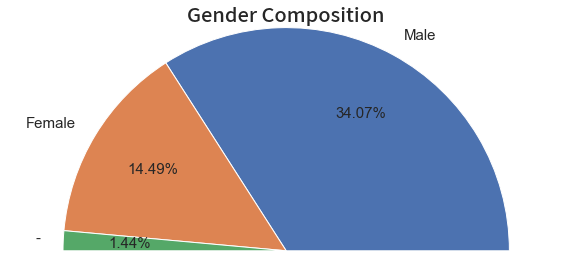

In [28]:
plt.rcParams['figure.figsize']=(10,6)

structure={df['Gender'].value_counts().index[i]:df['Gender'].value_counts().values[i] for i in range(3)}

plt.pie(
    x=np.array([df['Gender'].value_counts().values[i] for i in range(3)])/521/2,
    labels=structure.keys(),
    textprops={'size':15},
    autopct='%.2f%%',
    pctdistance=.7)

plt.ylim(.5,1)
plt.title('Gender Composition',fontproperties=myfont)

buffer=io.BytesIO()
plt.savefig(buffer,format='png',dpi=600,bbox_inches='tight',pad_inches=0)
buffer.seek(0)
pic_4=Image.open(buffer)

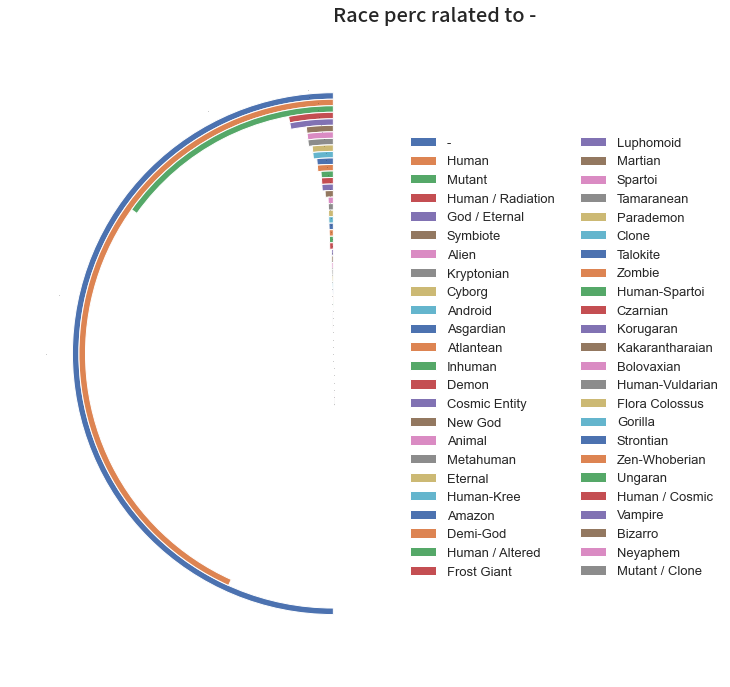

In [29]:
indicator=df['Race'].value_counts()[0]
toplot_1=pd.DataFrame()
toplot_1['project perc']=df['Race'].value_counts()/indicator/2
toplot_1['Race']=df['Race'].value_counts().index
toplot_1=toplot_1.set_index(['Race'])

width=.025
fig,ax=plt.subplots(1,1,figsize=(12,12))

for i,proj_perc in enumerate(toplot_1['project perc']):
    lst=[]
    lst.append(proj_perc)
    ax.pie(x=lst,startangle=90,radius=1-i*width,labels=['a'],autopct='',textprops={'size':0},wedgeprops={'width':width})

h,l=ax.get_legend_handles_labels()
plt.legend(handles=h,labels=list(toplot_1.index),ncol=2,bbox_to_anchor=(.6,.85),loc='upper left',frameon=False,fontsize=13)
plt.title('Race perc ralated to -',fontproperties=myfont,ha='left')

buffer=io.BytesIO()
plt.savefig(buffer,format='png',dpi=600,bbox_inches='tight',pad_inches=0)
buffer.seek(0)
pic_5=Image.open(buffer)

In [30]:
df['Place of birth'].value_counts()

-                                              265
New York, New York                               8
Chicago, Illinois                                7
Gotham City                                      7
New York City, New York                          6
                                              ... 
Hibbardsville, Kansas                            1
Fallville, Iowa                                  1
Unrevealed, presumably in the American West      1
(Galan) Taa; (Galactus) the Cosmic Egg           1
Niffleheim                                       1
Name: Place of birth, Length: 201, dtype: int64

In [31]:
df['Publisher'].value_counts()

Marvel Comics    332
DC Comics        189
Name: Publisher, dtype: int64

In [32]:
df['Race'].value_counts()

-                    185
Human                160
Mutant                56
Human / Radiation     11
God / Eternal         11
Symbiote               7
Alien                  7
Kryptonian             7
Cyborg                 6
Android                6
Asgardian              5
Atlantean              5
Inhuman                4
Demon                  4
Cosmic Entity          4
New God                3
Animal                 2
Metahuman              2
Eternal                2
Human-Kree             2
Amazon                 2
Demi-God               2
Human / Altered        2
Frost Giant            2
Luphomoid              1
Martian                1
Spartoi                1
Tamaranean             1
Parademon              1
Clone                  1
Talokite               1
Zombie                 1
Human-Spartoi          1
Czarnian               1
Korugaran              1
Kakarantharaian        1
Bolovaxian             1
Human-Vuldarian        1
Flora Colossus         1
Gorilla                1


In [33]:
re_df=df.copy()
lst=[]
for i in re_df.index:
    temp=[bool_index[x] for x in range(len(bool_index)) if re_df.loc[i,bool_index[x]]==1]
    lst.append(temp)
temp=pd.Series(lst,index=re_df.index)
re_df['Skill Num']=re_df[bool_index].sum(axis=1)
re_df['Skill Sets']=temp
re_df=re_df.drop(columns=bool_index)
re_df['Sento Ryoku']=re_df[float_index[4:]].sum(axis=1)
#'------' value here
#re_df['Sento Ryoku']=re_df['Sento Ryoku'].replace({'------':0})

# Sento Ryoku & Skill Sets

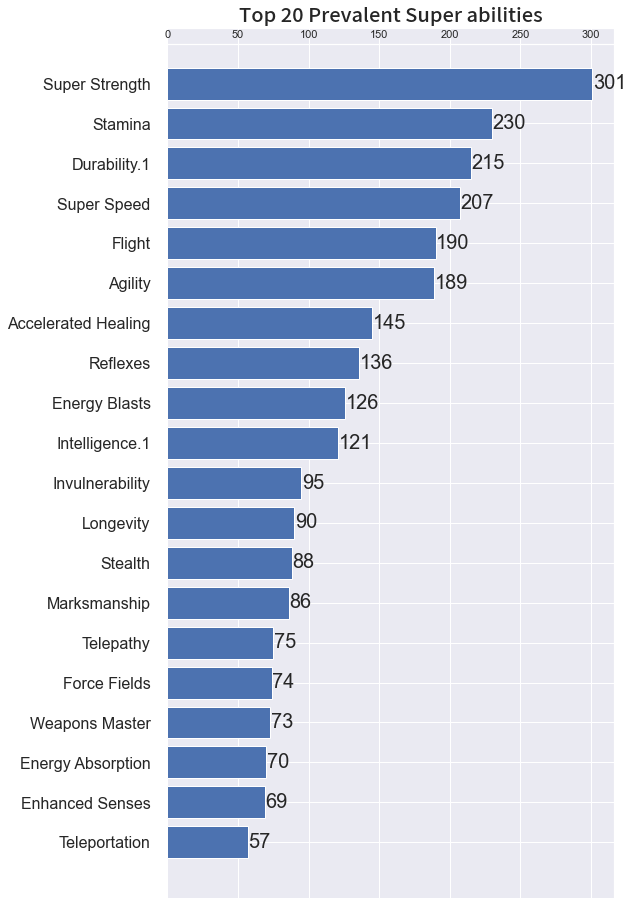

In [88]:
plt.rcParams['figure.figsize']=(8,16)
sns.set()

data=df.copy()
data=data[bool_index].sum(axis=0).sort_values(ascending=False)[:20]
data=data.sort_values()
plt.barh(data.index,data)
plt.title('Top 20 Prevalent Super abilities',ha='center',fontproperties=myfont)

ax=plt.gca()
ax.spines['bottom'].set_position(('data',len(data)))
ax.spines['left'].set_position(('data',-5))
ax.tick_params(axis='x',pad=-20)
ax.tick_params(axis='y',labelsize=16)

for y,width in zip(range(len(data.index)),data):
    plt.text(width+.5,y,width,fontsize=20,va='center')
    
buffer=io.BytesIO()
plt.savefig(buffer,format='png',dpi=600,bbox_inches='tight',pad_inches=0)
buffer.seek(0)
pic_6=Image.open(buffer)

In [36]:
no_one_has=df[bool_index].sum(axis=0)[df[bool_index].sum(axis=0)==0]
no_one_has

Hyperkinesis          0
Thirstokinesis        0
Changing Armor        0
Spatial Awareness     0
Intuitive aptitude    0
Melting               0
The Force             0
dtype: int64

In [37]:
df[bool_index].sum(axis=0).value_counts().describe()

count    61.000000
mean      2.737705
std       2.651425
min       1.000000
25%       1.000000
50%       2.000000
75%       4.000000
max      13.000000
dtype: float64

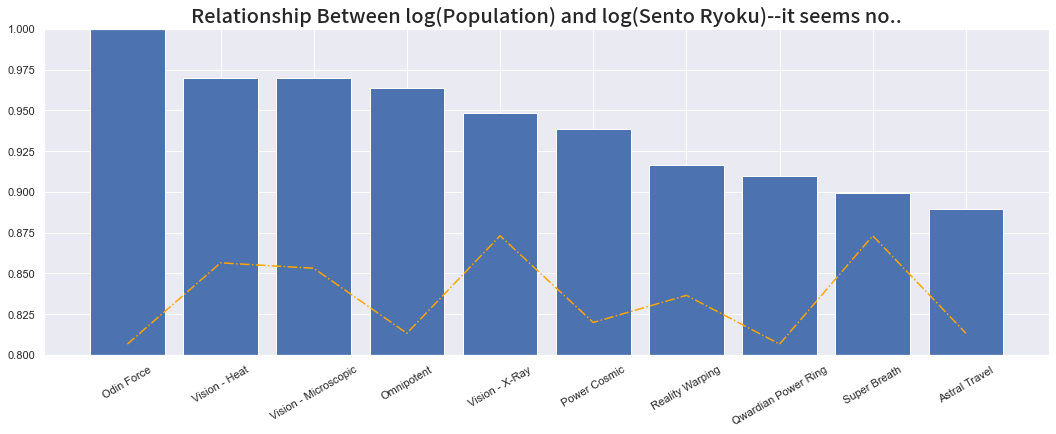

In [38]:
plt.rcParams['figure.figsize']=(18,6)

data=re_df.copy()
data['Sento Ryoku']=data['Sento Ryoku'].replace({'------':0})

avg=[]
for i in bool_index:
    num=0
    count=0
    for j in range(len(data)):
        if i in data.loc[j,'Skill Sets']:
            num+=data.loc[j,'Sento Ryoku']
            count+=1
    if count!=0:
        avg.append(num/count)
    elif count==0:
        avg.append(0)

data1=pd.DataFrame()
data1['bool_index']=bool_index
data1['avg']=avg
data1['popular']=df[bool_index].sum(axis=0).values
data1=data1[data1['popular']!=1]
temp=data1.sort_values(by=['avg'],ascending=False)

def stardardize():
    mean=(temp[:10]['avg']-temp['avg'].min())/(temp['avg'].max()-temp['avg'].min())
    pop=(temp[:10]['popular']-temp['popular'].min())/(temp['popular'].max()-temp['popular'].min())
    return mean,pop
minmaxscalar=stardardize()

plt.bar(temp[:10]['bool_index'],minmaxscalar[0])
plt.plot(temp[:10]['bool_index'],minmaxscalar[1]+0.8,color='orange',linestyle='-.')
plt.ylim((0.8,1))
plt.xticks(rotation='30')
plt.title('Relationship Between log(Population) and log(Sento Ryoku)--it seems no..',fontproperties=myfont)

buffer=io.BytesIO()
plt.savefig(buffer,format='png',dpi=600,bbox_inches='tight',pad_inches=0)
buffer.seek(0)
pic_7=Image.open(buffer)

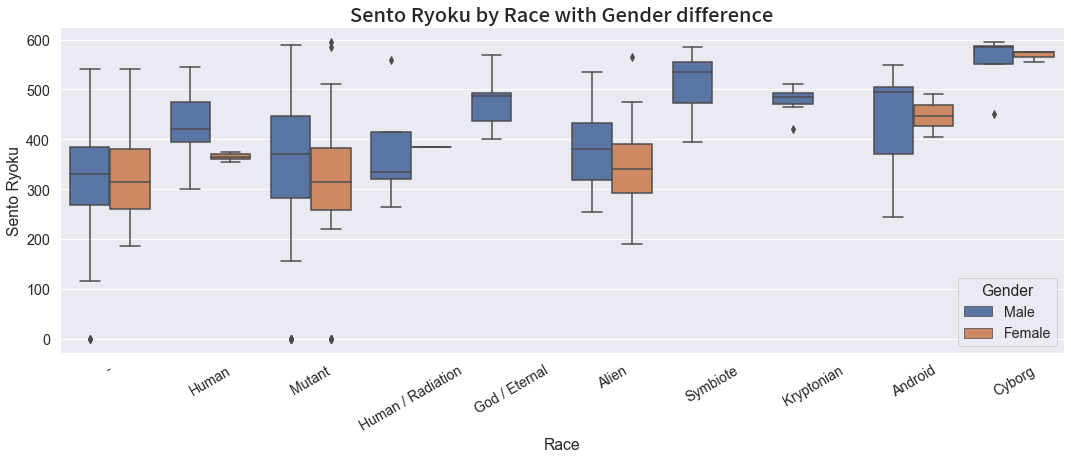

In [39]:
plt.rcParams['figure.figsize']=(18,6)

data=re_df.copy()
data=data.loc[(data['Gender']=='Male')|(data['Gender']=='Female')]
data['Sento Ryoku']=data['Sento Ryoku'].replace({'------':0})
races=data['Race'].value_counts()
data=data.loc[(data['Race']==races.index[0])|(data['Race']==races.index[1])|(data['Race']==races.index[2])|
              (data['Race']==races.index[3])|(data['Race']==races.index[4])|(data['Race']==races.index[5])|
              (data['Race']==races.index[6])|(data['Race']==races.index[7])|(data['Race']==races.index[8])|
              (data['Race']==races.index[9])]
sns.set(font_scale=1.3)
sns.boxplot(x='Race',y='Sento Ryoku',hue='Gender',data=data)
plt.xticks(ticks=np.arange(0,10),labels=races.index[:10],rotation=30,size=14)
plt.title('Sento Ryoku by Race with Gender difference',fontproperties=myfont)

buffer=io.BytesIO()
plt.savefig(buffer,format='png',dpi=600,bbox_inches='tight',pad_inches=0)
buffer.seek(0)
pic_8=Image.open(buffer)

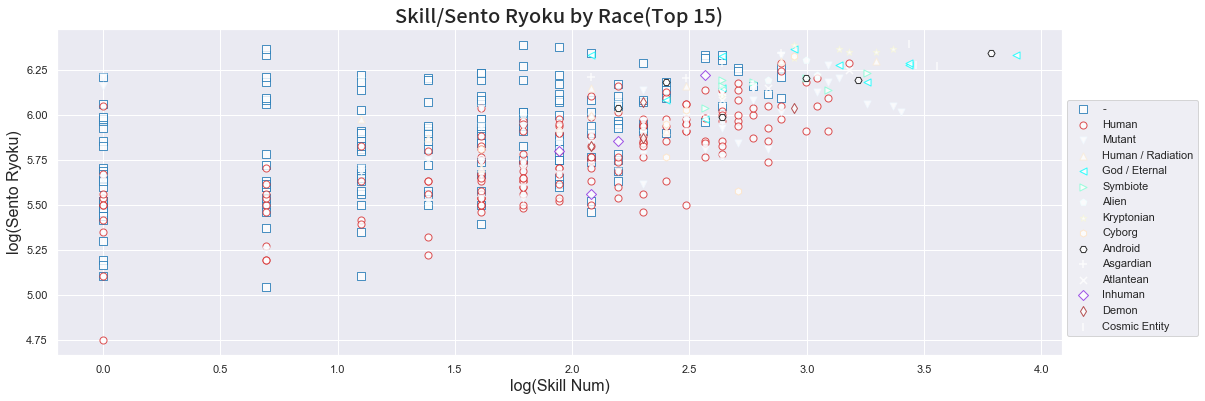

In [40]:
import matplotlib.colors as cs
plt.rcParams['figure.figsize']=(18,6)
sns.set()

data=re_df[['Skill Num','Sento Ryoku','Race']].copy()
data['Sento Ryoku']=data['Sento Ryoku'].replace({'------':0})

races=data['Race'].value_counts().index[:15]
colors=['tab:blue','tab:red']+[value for value in cs.CSS4_COLORS.values()]
markers='sov^<>p*hH+xDd|.,1234'

for i,race in enumerate(races):
    pdata=data[data['Race']==race]
    plt.scatter(
        np.log(pdata['Skill Num']),
        np.log(pdata['Sento Ryoku']),
        alpha=0.8,
        label=race,
        s=50,
        marker=markers[i],
        edgecolor=colors[i],
        facecolor='white',
        color=colors[i])

plt.legend(loc="upper left",bbox_to_anchor=(1.0,0.8))
plt.xlabel('log(Skill Num)',size=16)
plt.ylabel('log(Sento Ryoku)',size=16)
plt.title('Skill/Sento Ryoku by Race(Top 15)',fontproperties=myfont)

buffer=io.BytesIO()
plt.savefig(buffer,format='png',dpi=600,bbox_inches='tight',pad_inches=0)
buffer.seek(0)
pic_9=Image.open(buffer)

## Dashboard

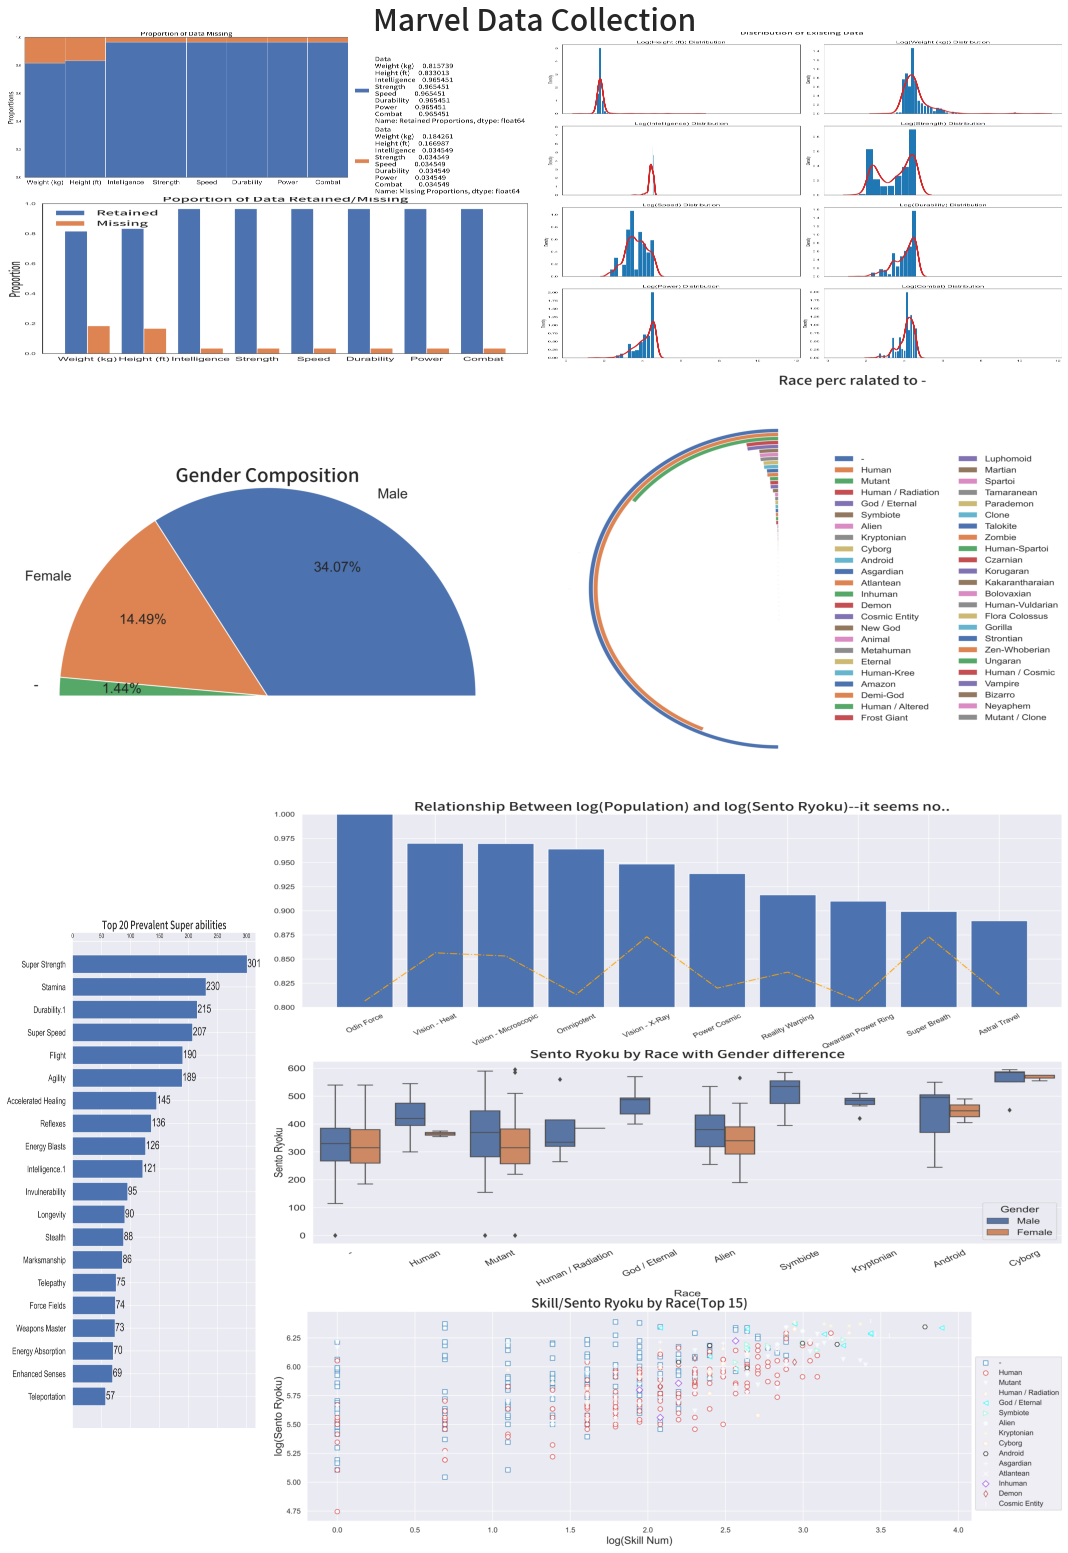

In [91]:
import matplotlib as mpl

myfont=mpl.font_manager.FontProperties(fname=fpath,size=30)
figure=plt.figure(figsize=(15,22))
plt.subplots_adjust(wspace=0,hspace=0,top=0.95)
gs_master=mpl.gridspec.GridSpec(3,4,height_ratios=[8,10,18])

#gs_1=mpl.gridspec.GridSpecFromSubplotSpec(1,1,subplot_spec=gs_master[0,:])
#title=figure.add_subplot(gs_1[0])
#title.set_title('Marvel Contest Collection Data',fontproperties=myfont)
#title.set_axis_off()
figure.suptitle('Marvel Data Collection',fontproperties=myfont)

gs_21=mpl.gridspec.GridSpecFromSubplotSpec(2,1,height_ratios=[1,1],subplot_spec=gs_master[0,:2])
miss_data_1=figure.add_subplot(gs_21[0])
miss_data_1.imshow(pic_1,aspect='auto')
miss_data_1.set_axis_off()
miss_data_2=figure.add_subplot(gs_21[1])
miss_data_2.imshow(pic_2,aspect='auto')
miss_data_2.set_axis_off()

gs_22=mpl.gridspec.GridSpecFromSubplotSpec(1,1,subplot_spec=gs_master[0,2:])
exist_data=figure.add_subplot(gs_22[0])
exist_data.imshow(pic_3,aspect='auto')
exist_data.set_axis_off()

gs_31=mpl.gridspec.GridSpecFromSubplotSpec(1,1,subplot_spec=gs_master[1,:2])
race_data_1=figure.add_subplot(gs_31[0])
race_data_1.imshow(pic_4,aspect='equal')
race_data_1.set_axis_off()

gs_32=mpl.gridspec.GridSpecFromSubplotSpec(1,1,subplot_spec=gs_master[1,2:])
race_data_2=figure.add_subplot(gs_32[0])
race_data_2.imshow(pic_5,aspect='auto')
race_data_2.set_axis_off()

gs_4=mpl.gridspec.GridSpecFromSubplotSpec(1,1,subplot_spec=gs_master[2:,:1])
dist=figure.add_subplot(gs_4[0])
dist.imshow(pic_6,aspect='equal',extent=[0,1,0,2])
dist.set_axis_off()

gs_41=mpl.gridspec.GridSpecFromSubplotSpec(3,1,subplot_spec=gs_master[2,1:])
skill_1=figure.add_subplot(gs_41[0])
skill_1.imshow(pic_7,aspect='auto')
skill_1.set_axis_off()
skill_2=figure.add_subplot(gs_41[1])
skill_2.imshow(pic_8,aspect='auto')
skill_2.set_axis_off()
skill_3=figure.add_subplot(gs_41[2])
skill_3.imshow(pic_9,aspect='auto')
skill_3.set_axis_off()

gs_master.tight_layout(figure)
plt.savefig('temp_proj.png',bbox_inches='tight',pad_inches=0,dpi=600)
plt.show()

# --------------------------------------------------

In [26]:
import ipywidgets as widgets
from IPython.display import display
from ipywidgets import interact,interact_manual,VBox,Layout

In [27]:
for i in float_index[:]:
    print(i,np.array([e for e in df[i].values if e!='-']).min(),np.array([e for e in df[i].values if e!='-']).max())

Height (ft) 2.099737532808399 1000.0
Height (cm) 64.0 30480.0
Weight (lb) 40.0 128000.0
Weight (kg) 18.0 58000.0
Intelligence 35.0 100.0
Strength 5.0 100.0
Speed 10.0 100.0
Durability 5.0 100.0
Power 5.0 100.0
Combat 10.0 105.0


In [28]:
for e in (float_index[0:1],float_index[3:]):
    for i in e:
        print(i)
        globals()[i.split(' ')[0]]=widgets.FloatRangeSlider(
            min=int(np.array([e for e in df[i].values if e!='-']).min()),
            max=int(np.array([e for e in df[i].values if e!='-']).max()),
            value=[int(np.array([e for e in df[i].values if e!='-']).min()),int(np.array([e for e in df[i].values if e!='-']).max())],
            step=1,
            description=i+':',
            readout_format='d')

Height (ft)
Weight (kg)
Intelligence
Strength
Speed
Durability
Power
Combat


In [29]:
attr_num=widgets.FloatSlider(max=49,min=1,step=1,description='Skills Num: ',readout_format='d')

In [30]:
show=widgets.SelectMultiple(options=str_index+float_index+['Skill Num','Skill Sets'],description='Display:')

# -------------------------------------------

# Selection based on certain criteria

In [31]:
@interact
def show_df(height=Height,weight=Weight,iq=Intelligence,strg=Strength,spd=Speed,dur=Durability,power=Power,
            combat=Combat,attrs=attr_num,display=show):
    data=df[(df['Height (ft)'].apply(lambda x: x=='-' or (x>=height[0] and x<=height[1])))&
            (df['Weight (kg)'].apply(lambda x: x=='-' or (x>=weight[0] and x<=weight[1])))&
            (df['Intelligence'].apply(lambda x: x=='-' or (x>=iq[0] and x<=iq[1])))&
            (df['Strength'].apply(lambda x: x=='-' or (x>=strg[0] and x<=strg[1])))&
            (df['Speed'].apply(lambda x: x=='-' or (x>=spd[0] and x<=spd[1])))&
            (df['Durability'].apply(lambda x: x=='-' or (x>=dur[0] and x<=dur[1])))&
            (df['Power'].apply(lambda x: x=='-' or (x>=power[0] and x<=power[1])))&
            (df['Combat'].apply(lambda x: x=='-' or (x>=combat[0] and x<=combat[1])))&
            (df[bool_index].sum(axis=1)==attrs)].copy()
    data['Skill Num']=data[bool_index].sum(axis=1)
    lst=[]
    for i in data.index:
        temp=[bool_index[x] for x in range(len(bool_index)) if data.loc[i,bool_index[x]]==1]
        lst.append(temp)
    temp=pd.Series(lst,index=data.index)
    data['Skill Sets']=temp
    data=data.drop(columns=bool_index)
    display=[str(i) for i in display]
    return data[display]

interactive(children=(FloatRangeSlider(value=(2.0, 1000.0), description='Height (ft):', max=1000.0, min=2.0, r…